In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
#from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

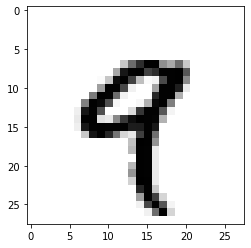

9


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
plt.imshow(train_images[4],cmap=plt.cm.binary)
plt.show()
print(train_labels[4])

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 2.4783 - accuracy: 0.8571
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3902 - accuracy: 0.9018 0s - loss: 0.3913 - accuracy: 0.
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2918 - accuracy: 0.9236
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2520 - accuracy: 0.9337
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2335 - accuracy: 0.9397


In [ ]:
# Code from Chapter 3 of Machine Learning: An Algorithmic Perspective (2nd Edition)
# by Stephen Marsland (http://stephenmonika.net)

# You are free to use, change, or redistribute the code in any way you wish for
# non-commercial purposes, but please maintain the name of the original author.
# This code comes with no warranty of any kind.

# Stephen Marsland, 2008, 2014



class pcn:
	""" A basic Perceptron (the same pcn.py except with the weights printed
	and it does not reorder the inputs)"""

	def __init__(self,inputs,targets):
		""" Constructor """
		# Set up network size
		if np.ndim(inputs)>1:
			self.nIn = np.shape(inputs)[1]
		else:
			self.nIn = 1

		if np.ndim(targets)>1:
			self.nOut = np.shape(targets)[1]
		else:
			self.nOut = 1

		self.nData = np.shape(inputs)[0]

		# Initialise network
		self.weights = np.random.rand(self.nIn+1,self.nOut)*0.1-0.05

	def pcntrain(self,inputs,targets,eta,nIterations):
		""" Train the thing """
		# Add the inputs that match the bias node
		inputs = np.concatenate((inputs,-np.ones((self.nData,1))),axis=1)

		# Training
		change = range(self.nData)

		for n in range(nIterations):

			self.activations = self.pcnfwd(inputs);
			self.weights -= eta*np.dot(np.transpose(inputs),self.activations-targets)
			print("Iteration: ", n)
			print(self.weights)

			activations = self.pcnfwd(inputs)
			print("Final outputs are:")
			print(activations)
		#return self.weights

	def pcnfwd(self,inputs):
		""" Run the network forward """

		# Compute activations
		activations =  np.dot(inputs,self.weights)

		# Threshold the activations
		return np.where(activations>0,1,0)

	def confmat(self,inputs,targets):
		"""Confusion matrix"""

		# Add the inputs that match the bias node
		inputs = np.concatenate((inputs,-np.ones((self.nData,1))),axis=1)
		outputs = np.dot(inputs,self.weights)

		nClasses = np.shape(targets)[1]

		if nClasses==1:
			nClasses = 2
			outputs = np.where(outputs>0,1,0)
		else:
			# 1-of-N encoding
			outputs = np.argmax(outputs,1)
			targets = np.argmax(targets,1)

		cm = np.zeros((nClasses,nClasses))
		for i in range(nClasses):
			for j in range(nClasses):
				cm[i,j] = np.sum(np.where(outputs==i,1,0)*np.where(targets==j,1,0))

		print(cm)
		print(np.trace(cm)/np.sum(cm))

In [4]:
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
filename = "./data/iris.csv"
open(filename, 'wb').write(r.content)

df = pd.read_csv(filename, header=None, names=['sepal_length','sepal_width','petal_length','petal_width','species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
def accept_complier(invited):
    return invited

def accept_always(invited):
    return np.ones_like(invited)

def accept_never(invited):
    return np.zeros_like(invited)

N_simulations = 10000
fraction_training = 0.2 # 20% of agents are invited to the training
types = ['complier','always_taker', 'never_taker']
β = {'complier': 1, 'always_taker': 2, 'never_taker': 1}
τ = {'complier': 3, 'always_taker': 4, 'never_taker': 1}
n = {'complier': 0.5, 'always_taker': 0.25, 'never_taker': 0.25}
accept = {'complier': accept_complier, 'always_taker': accept_always, 'never_taker': accept_never} # note that this dictionary returns a function
earnings_without = {}
training_effect = {}
earnings = {}
invited = {}
trained = {}
df = pd.DataFrame()
def data_simulation(β = β, τ=τ, n = n):
    for j in types:
        earnings_without[j] = np.random.normal(loc = β[j], scale = 1.0, size = int(n[j]*N_simulations))
        training_effect[j] = np.random.normal(loc = τ[j], scale = 1.0, size = int(n[j]*N_simulations))
        invited[j] = np.random.binomial(1,fraction_training,size = int(n[j]*N_simulations))
        trained[j] = accept[j](invited[j])
        earnings[j] = earnings_without[j]+ trained[j]*training_effect[j]
    column_invited = np.concatenate([invited[j] for j in types],axis=0)
    column_trained = np.concatenate([trained[j] for j in types],axis=0)
    column_earnings = np.concatenate([earnings[j] for j in types],axis=0)
    df = pd.DataFrame({'invited':column_invited, 'trained':column_trained,'earnings':column_earnings})
    return df
 
df = data_simulation()
df.head()


,invited,trained,earnings
0,0,0,1.336763
1,0,0,2.550819
2,0,0,0.888564
3,0,0,3.071155
4,0,0,0.841638


In [6]:
EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']
